In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/data/adata.zip' -d ./data/

In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPool2D,GlobalAveragePooling2D,Input
from keras.optimizers import Adam
from keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import cv2
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import json

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
def create_gens(function):
  train_path="./data/adata"
  train_datagen=ImageDataGenerator(preprocessing_function = function,
                                  rotation_range=30.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,validation_split=0.1
                                  )
  train_generator=train_datagen.flow_from_directory(
  directory=train_path,  subset='training',
      batch_size=128)
  validation_generator = train_datagen.flow_from_directory(
    directory=train_path, class_mode="categorical", subset='validation',
    batch_size=32)
  return train_generator, validation_generator


In [ ]:
from keras.optimizers import Adam
optimizer1=keras.optimizers.Adam()

In [ ]:
from keras.optimizers import SGD
optimizer2=SGD(lr=0.1, momentum=0.9,nesterov=True)

In [ ]:
def acccuracy_plot(history):
  plt.figure(figsize=(10, 5))
  plt.figure(figsize=(10, 5))
  plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
  plt.plot(history.history['val_accuracy'], label='Точность на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Точность')
  plt.legend()
  plt.show()

ResNet50

In [ ]:
from keras.applications.resnet import preprocess_input as resnet_preprocess
train_generator, validation_generator=create_gens(resnet_preprocess)
step_size_valid=validation_generator.n//validation_generator.batch_size
step_size_train=train_generator.n//train_generator.batch_size

In [ ]:
from keras.applications.resnet import ResNet50
model=ResNet50(weights='imagenet', include_top=False,input_shape=train_generator.image_shape)
model.trainable = True
x = model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(23, activation='softmax')(x)
model = Model(inputs=model.input, outputs=x)
model.compile(optimizer=optimizer1, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [ ]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    validation_data=validation_generator,
                    validation_steps=step_size_valid,
                    epochs=30, verbose=1,shuffle=True)

In [ ]:
model_path='/content/drive/MyDrive/Colab Notebooks/model/resnet50.h5'

In [ ]:
model.save(model_path)

In [ ]:
history_dict = history.history
your_history_path='/content/drive/MyDrive/Colab Notebooks/model/resnet50_history2.json'
json.dump(history_dict, open(your_history_path, 'w'))

In [ ]:
your_history_path='/content/drive/MyDrive/Colab Notebooks/model/resnet50_history2.json'
with open(your_history_path) as json_file:
    data = json.load(json_file)

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/resnet50.h5')

In [ ]:
preds1=model.predict_generator(validation_generator)

In [ ]:
predicted_class_indices=np.argmax(preds1,axis=1)

In [1]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_generator.labels, predicted_class_indices)

0.6045771543086172


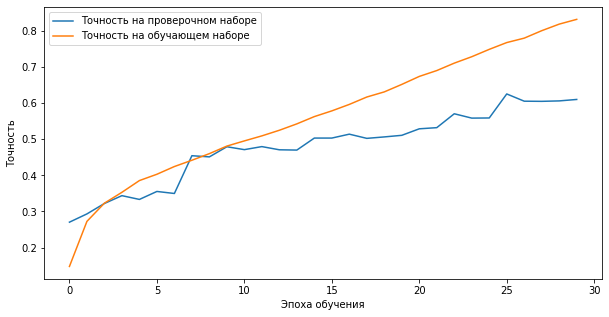

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data['val_accuracy'], label='Точность на проверочном наборе')
plt.plot(data['accuracy'], label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

DenseNet169

In [ ]:
from tensorflow.keras.applications.densenet import preprocess_input as preprocess
train_generator, validation_generator=create_gens(preprocess)
step_size_valid=validation_generator.n//validation_generator.batch_size
step_size_train=train_generator.n//train_generator.batch_size

In [ ]:
from tensorflow.keras.applications import DenseNet169
model = DenseNet169(weights='imagenet', include_top=False)
model.trainable = True
x = model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dense(23, activation='softmax')(x)
model = Model(inputs=model.input, outputs=x)
model.compile(optimizer=optimizer1, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    validation_data=validation_generator,
                    validation_steps=step_size_valid,
                    epochs=30, verbose=1,shuffle=True)

In [ ]:
model_path='/content/drive/MyDrive/Colab Notebooks/model/DenseNet169.h5'

In [ ]:
model.save(model_path)

In [ ]:
your_history_path='/content/drive/MyDrive/Colab Notebooks/model/DenseNet169_history.json'

In [ ]:
history_dict = history.history
json.dump(history_dict, open(your_history_path, 'w'))

In [ ]:
with open(your_history_path) as json_file:
    data = json.load(json_file)

In [ ]:
model=keras.models.load_model(model_path)

In [ ]:
preds1=model.predict_generator(validation_generator)

In [ ]:
predicted_class_indices=np.argmax(preds1,axis=1)

In [2]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_generator.labels, predicted_class_indices)

0.6328772991096165

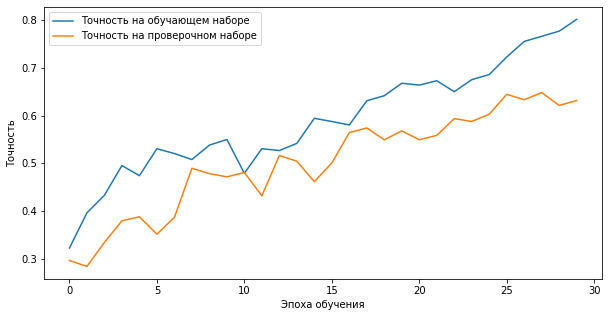

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data['val_accuracy'], label='Точность на проверочном наборе')
plt.plot(data['accuracy'], label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

InceptionResNetV2

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess
train_generator, validation_generator=create_gens(preprocess)
step_size_valid=validation_generator.n//validation_generator.batch_size
step_size_train=train_generator.n//train_generator.batch_size

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
model = InceptionResNetV2(weights='imagenet', include_top=False)
model.trainable = True
x = model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dense(23, activation='softmax')(x)
model = Model(inputs=model.input, outputs=x)
model.compile(optimizer=optimizer1, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    validation_data=validation_generator,
                    validation_steps=step_size_valid,
                    epochs=30, verbose=1,shuffle=True)

In [ ]:
model_path='/content/drive/MyDrive/Colab Notebooks/model/InceptionResNetV2.h5'

In [ ]:
model.save(model_path)

In [ ]:
your_history_path='/content/drive/MyDrive/Colab Notebooks/model/InceptionResNetV2_history.json'

In [ ]:
history_dict = history.history
json.dump(history_dict, open(your_history_path, 'w'))

In [ ]:
with open(your_history_path) as json_file:
    data = json.load(json_file)

In [ ]:
model=keras.models.load_model(model_path)

In [ ]:
preds1=model.predict_generator(validation_generator)

In [ ]:
predicted_class_indices=np.argmax(preds1,axis=1)

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_generator.labels, predicted_class_indices)

0.6155903911412178

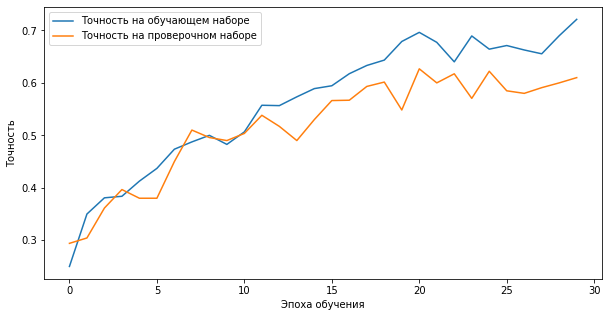

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data['val_accuracy'], label='Точность на проверочном наборе')
plt.plot(data['accuracy'], label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

EfficientNetB3

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess
train_generator, validation_generator=create_gens(preprocess)
step_size_valid=validation_generator.n//validation_generator.batch_size
step_size_train=train_generator.n//train_generator.batch_size

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
model = EfficientNetB3(weights='imagenet', include_top=False)
model.trainable = True
x = model.output
x = GlobalMaxPooling2D(name='max_pool')(x)
x = Dense(23, activation='softmax')(x)
model = Model(inputs=model.input, outputs=x)
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=step_size_train,
                    validation_data=validation_generator,
                    validation_steps=step_size_valid,
                    epochs=30, verbose=1,shuffle=True)

In [ ]:
model_path='/content/drive/MyDrive/Colab Notebooks/model/EfficientNetB3.h5'

In [ ]:
model.save(model_path)

In [ ]:
your_history_path='/content/drive/MyDrive/Colab Notebooks/model/EfficientNetB3.json'

In [ ]:
history_dict = history.history
json.dump(history_dict, open(your_history_path, 'w'))

In [ ]:
with open(your_history_path) as json_file:
    data = json.load(json_file)

In [ ]:
model=keras.models.load_model(model_path)

In [ ]:
preds1=model.predict_generator(validation_generator)

In [ ]:
predicted_class_indices=np.argmax(preds1,axis=1)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_generator.labels, predicted_class_indices)

0.634610995671327

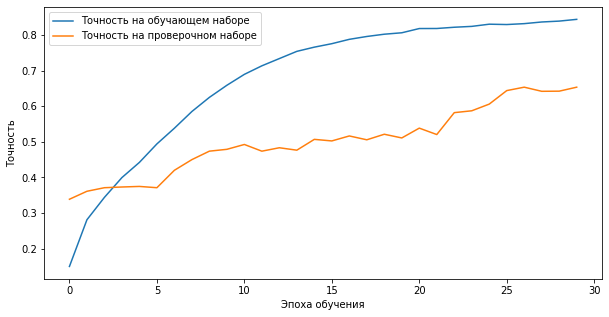

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data['val_accuracy'], label='Точность на проверочном наборе')
plt.plot(data['accuracy'], label='Точность на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

Ensembly


In [ ]:
densenet = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/DenseNet169.h5')
efficientnet = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/EfficientNetB3.h5')
incresnet= keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/InceptionResNetV2.h5')
resnet=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/resnet50.h5')

In [ ]:
preds1=densenet.predict_generator(test_generator)
preds2=efficientnet.predict_generator(test_generator)
preds3=incresnet.predict_generator(test_generator)
preds4=resnet.predict_generator(test_generator)

In [5]:
final_predictions=preds1+preds2+pred3+preds4
predicted_class_indices=np.argmax(final_predictions,axis=1)
result=accuracy_score(test_generator.labels, predicted_class_indices)
print(result)

0.570561122244489

In [6]:
final_predictions=preds1+preds2+pred3
predicted_class_indices=np.argmax(final_predictions,axis=1)
result=accuracy_score(test_generator.labels, predicted_class_indices)
print(result)

0.6245891783567135

In [ ]:
final_predictions=preds1+preds2
predicted_class_indices=np.argmax(final_predictions,axis=1)
result=accuracy_score(test_generator.labels, predicted_class_indices)
print(result)

0.6612361798768251
